In [4]:
import pandas as pd
import csv
from matplotlib import pyplot as plt 
import numpy as np
import h5py


def raed_custom_pa(file):
    f = open(file, 'r')
    pa_python = f.read()
    pa_python = pa_python.split(' ')[1:]
    pa_python_int = []
    for i in pa_python:
        pa_python_int.append(float(i))
    pa_python_e = pa_python_int
    f.close()
    return pa_python_int

def read_csv(file, clipname):
    df = pd.read_csv(file)
    df = df.fillna(0)
    pa_matlab = list(df.loc[df['clip'] == '~/IC_Utils/src/data/audio/'+clipname, "PA"])
    pa_matlab = np.asarray(pa_matlab)
    pa_matlab = (pa_matlab-min(pa_matlab))/(max(pa_matlab)-min(pa_matlab))
    return pa_matlab

def read_h5(file, clipname):
#f = h5py.File('eccv16_dataset_summe_google_pool5.h5', 'r')
    f = h5py.File(file, 'r')
    videos = list(f.keys())
    for video in videos:
        if f[video]['name'][()].decode() == clipname:
            gtscore = f[video]['heatmap'][()]
            nframes = f[video]['n_frames'][()]
            break
    nframes = int(nframes.decode())
    gtscore = gtscore.tolist()
    gtscore = np.asarray(gtscore)
    gtscore = gtscore/100
    return gtscore, nframes

def normalization(pa_matlab, nframes):
    pa_matlab = np.repeat(pa_matlab, int(nframes/pa_matlab.shape[0]))
    return pa_matlab

def names(file):
    f = h5py.File(file, 'r')
    videos = list(f.keys())
    v_names = []
    for video in videos:
        v_names.append(f[video]['name'][()].decode())
    return v_names

video_names = names('mytest.h5')
print(video_names)

pas_matlab = []
gtscores = []

for name in video_names:
    gtscore, nframes = read_h5('mytest.h5', name)
    pa_matlab = read_csv('youtube_test.csv', name)
    pas_matlab.append(normalization(pa_matlab, nframes))
    gtscores.append(gtscore)
print(len(pas_matlab))
print(len(gtscores))
print(gtscores[0])

['NYC_Snow_Walk__Rockefeller_Center_Bryant_Park_Times_Square_December_16_2020', '4KWALK_Fifth_Avenue_NEW_YORK_City_USA_vlog_4k_video_TRAVEL', 'COPACABANA_Rio_de_Janeiro_Walking_Tour_BRAZIL__Rain_Walk_Narrated4K', '_DEEP_INSIDE_FAVELA_DISTRICT_RIO__BRAZIL_2022_FULL_TOUR', 'Lacock_England_a_beautiful_village_and_morning_walk.', 'Buenos_Aires_Argentina___City_Walking_Tour_4K', '4KModern_Japanese_Neighborhood__Beautiful_Sunset_Walking_Tour_Chikusa_Ward_Nagoya', 'Oslo_Norway__June__2022__4KHDR_Walking_Tour']
8
8
[0.51 0.51 0.51 ... 0.   0.   0.  ]


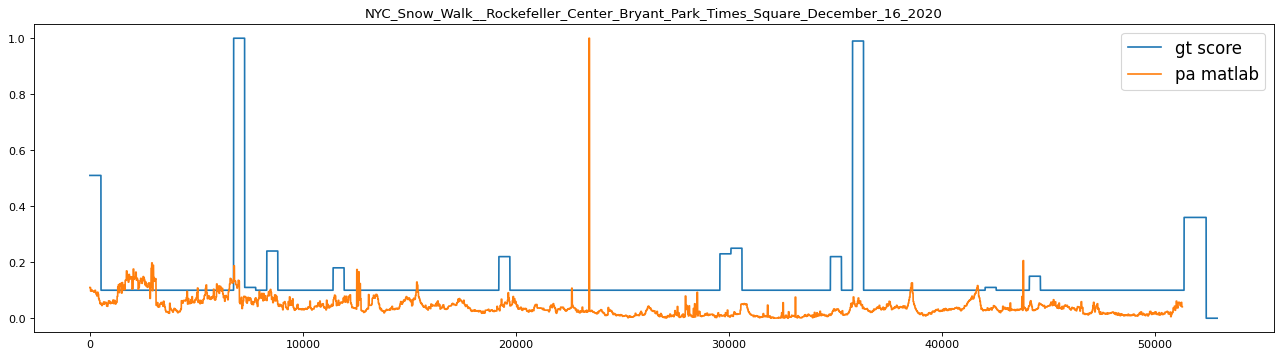

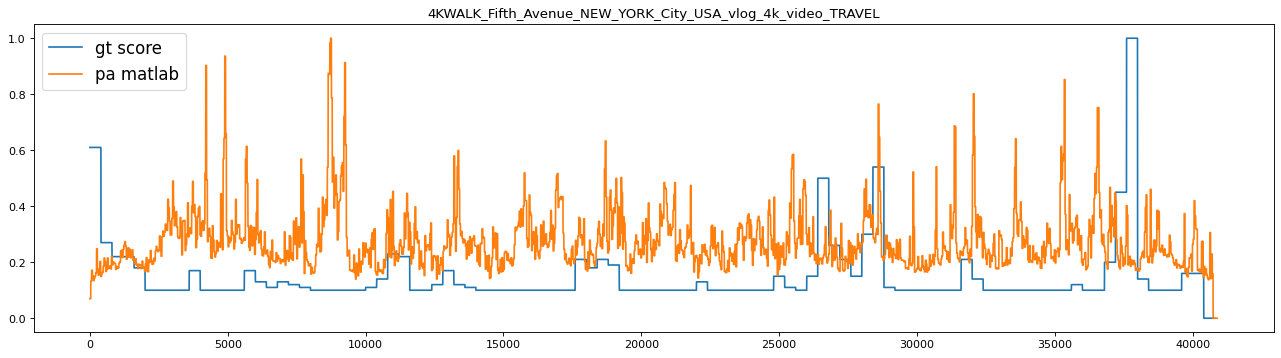

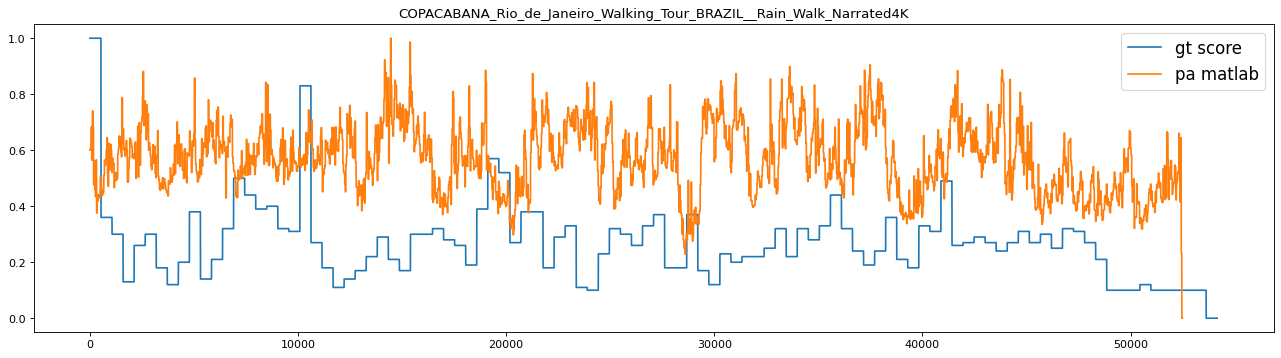

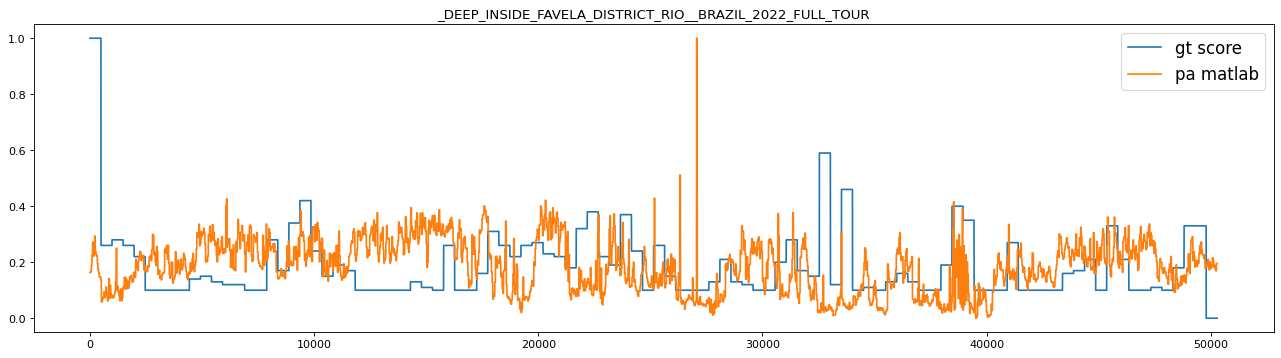

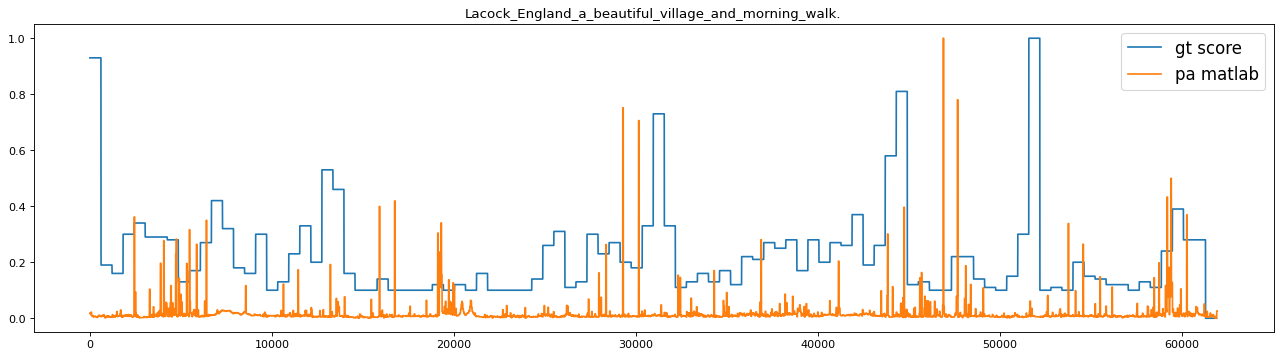

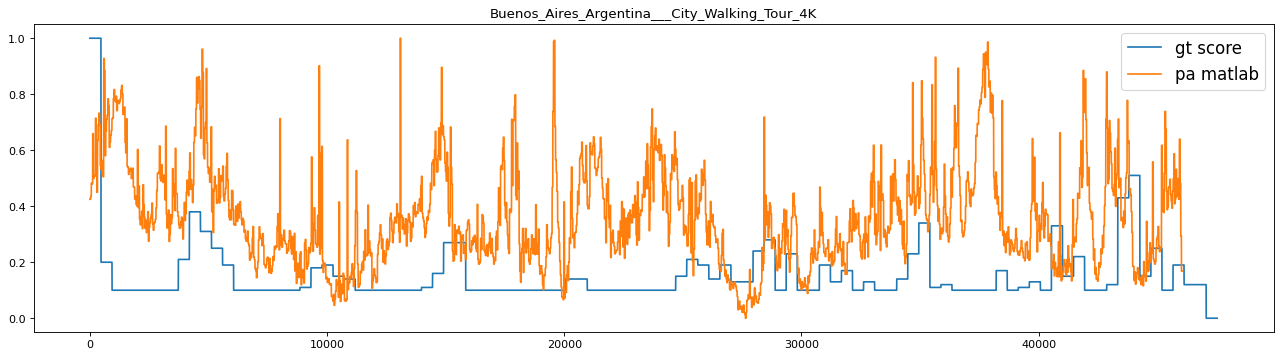

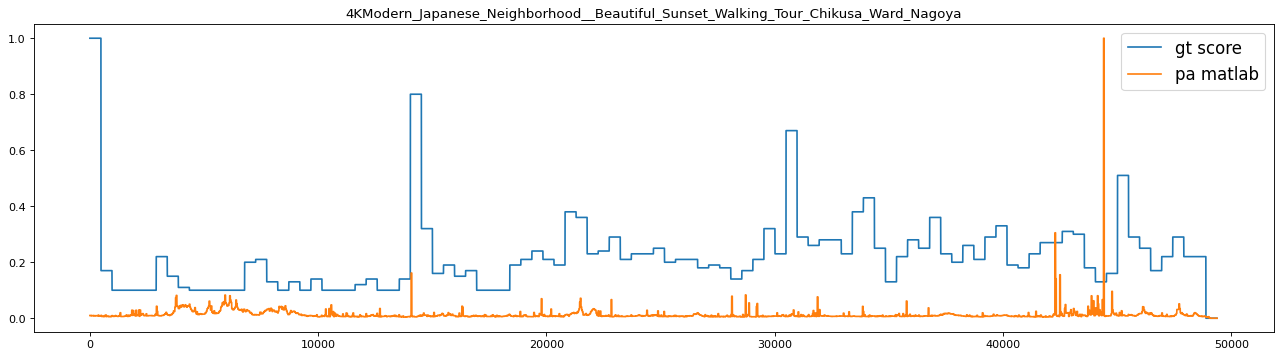

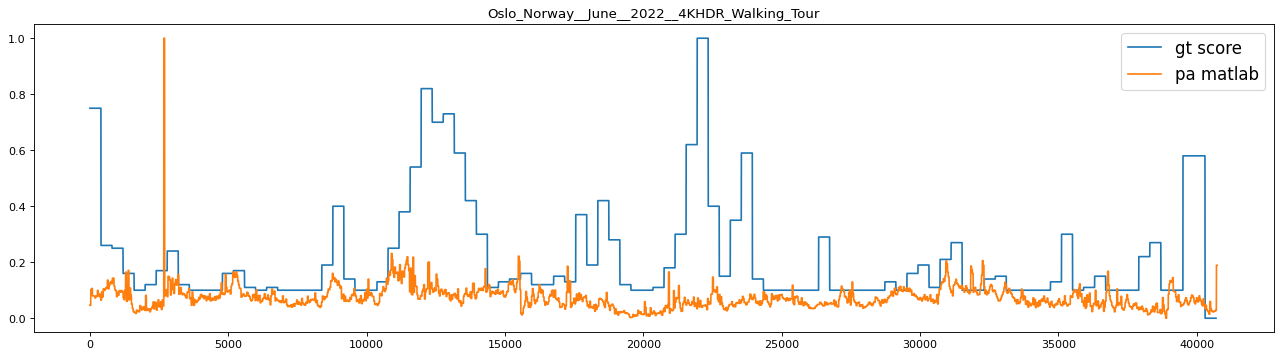

In [6]:
for idx, name in enumerate(video_names):
    plt.figure(figsize=(20, 5), dpi=80)
    plt.title(name)
    plt.rcParams['legend.fontsize'] = 15
    plt.plot(gtscores[idx], label="gt score")
    plt.plot(pas_matlab[idx], label="pa matlab")
    plt.legend()
    plt.show()

Text(0.5, 1.0, 'pa python estacionario')

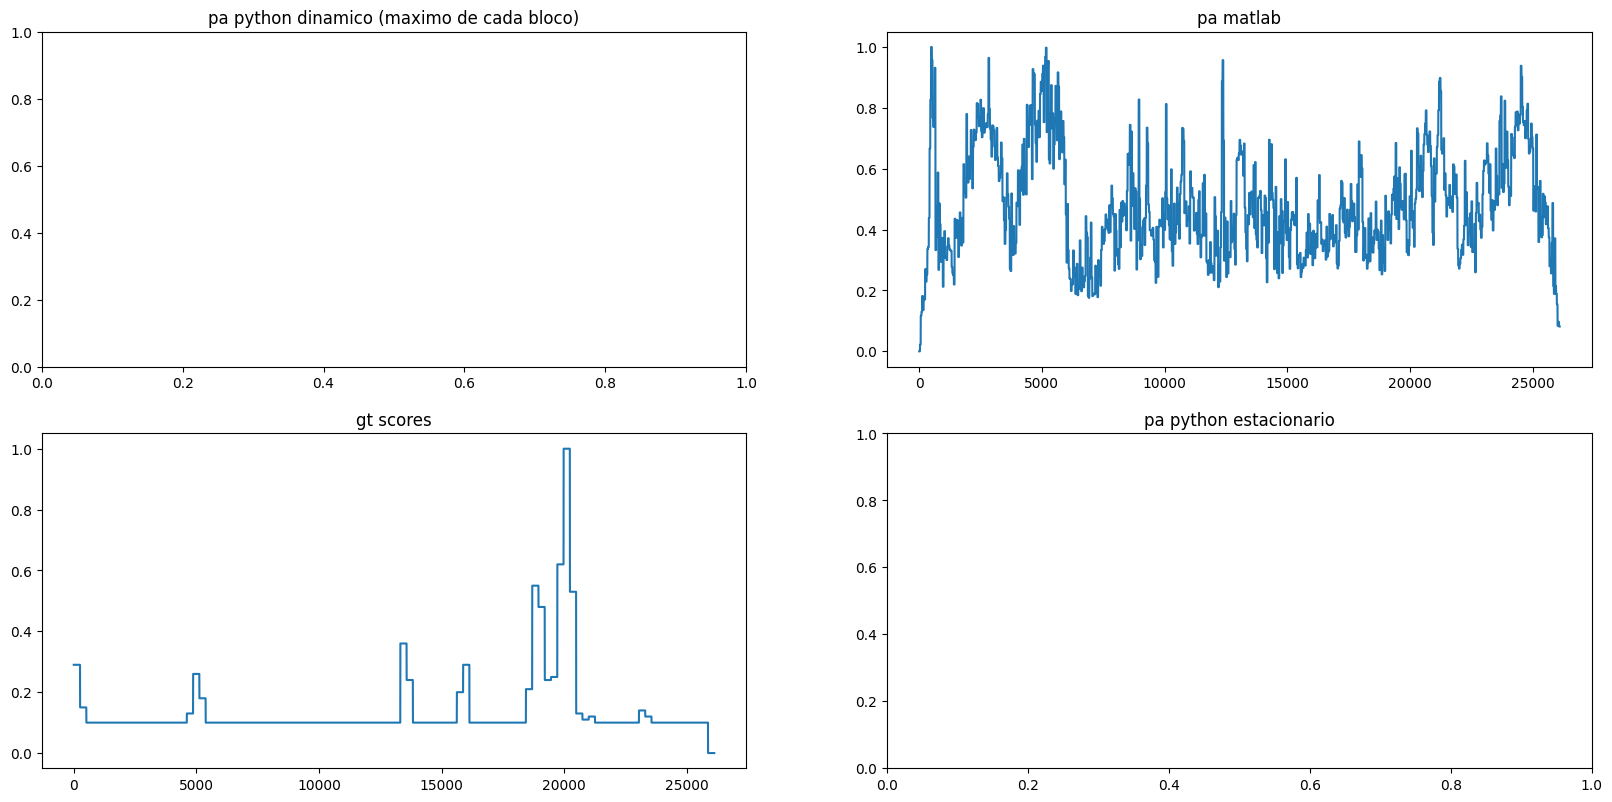

In [86]:
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(4, 2, 1)
ax1.set_title('pa python dinamico (maximo de cada bloco)')
#ax1.plot(np.repeat(pa_python_d, int(nframes/len(pa_python))))
ax2 = fig.add_subplot(4, 2, 2)
ax2.set_title('pa matlab')
ax2.plot(np.repeat(pa_matlab, int(nframes/len(pa_matlab))))
ax3 = fig.add_subplot(4, 2, 3)
ax3.set_title('gt scores')
ax3.plot(np.repeat(gtscore, int(nframes/len(gtscore))))
ax3 = fig.add_subplot(4, 2, 4)
ax3.set_title('pa python estacionario')
#ax3.plot(np.repeat(pa_python_e, int(nframes/len(pa_python_e))))

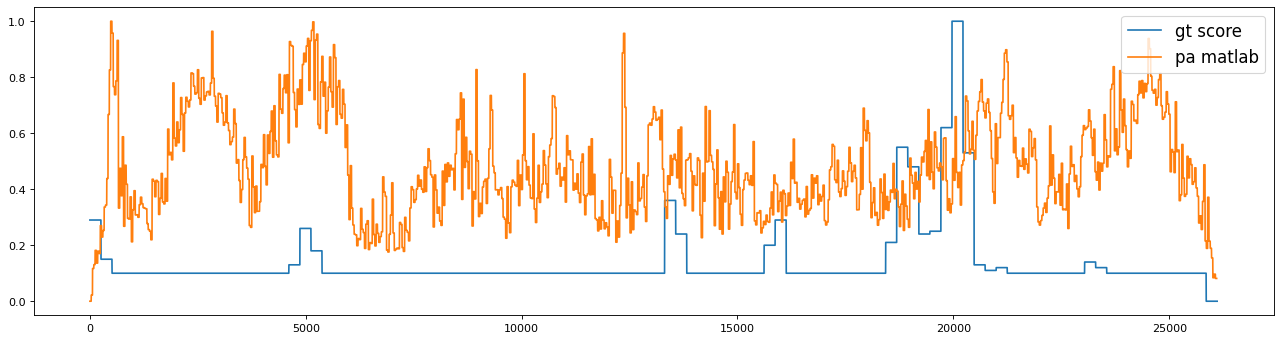

In [87]:

plt.figure(figsize = (20, 5), dpi=80)
plt.rcParams['legend.fontsize'] = 15
plt.plot(gtscore, label="gt score")
plt.plot(np.repeat(pa_matlab, int(nframes/len(pa_matlab))), label="pa matlab")
plt.legend()
plt.show()